In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/Finalyze Capital Carry Strategy

Mounted at /content/drive
/content/drive/My Drive/Finalyze Capital Carry Strategy


In [3]:
%cd /content/drive/My Drive/Finalyze Capital Externship/Finalyze Capital Carry Strategy

[Errno 2] No such file or directory: '/content/drive/My Drive/Finalyze Capital Externship/Finalyze Capital Carry Strategy'
/content/drive/My Drive/Finalyze Capital Carry Strategy


In [4]:
import pandas as pd
df = pd.read_csv('trades.csv')

df['Cumulative_Return'] = df['result'].cumsum()
df['Rolling_Return'] = df['Cumulative_Return'].rolling(window=30).mean()

df['Rolling_Sh_PnL'] = df['result'].rolling(window=30).mean()
df['Rolling_Sh_Std'] = df['result'].rolling(window=30).std()
df['Rolling_Sharpe'] = df['Rolling_Sh_PnL'] / df['Rolling_Sh_Std']

df.head(50)

,currency_pair,open_date,position,trade_amount,result,Cumulative_Return,Rolling_Return,Rolling_Sh_PnL,Rolling_Sh_Std,Rolling_Sharpe
0,JP/SW,2010-01-04,short,199.691223,22.575073,22.575073,NaN,NaN,NaN,NaN
1,AU/SW,2010-01-04,short,43.137991,15.331242,37.906315,NaN,NaN,NaN,NaN
2,CA/SW,2010-01-04,short,63.927052,18.503685,56.410000,NaN,NaN,NaN,NaN
3,AU/JP,2010-01-04,short,26.398447,6.397666,62.807666,NaN,NaN,NaN,NaN
4,CA/JP,2010-01-04,short,45.988634,8.112400,70.920066,NaN,NaN,NaN,NaN
5,CA/AU,2010-01-04,short,97.212531,-6.411166,64.508900,NaN,NaN,NaN,NaN
6,JP/SW,2010-01-05,short,198.664670,22.459021,86.967921,NaN,NaN,NaN,NaN
7,AU/SW,2010-01-05,short,43.000229,15.282281,102.250202,NaN,NaN,NaN,NaN
8,CA/SW,2010-01-05,short,64.917052,18.790241,121.040443,NaN,NaN,NaN,NaN
9,AU/JP,2010-01-05,short,26.660283,6.461122,127.501565,NaN,NaN,NaN,NaN


In [5]:
df['date'] = pd.to_datetime(df['open_date'])

daily_returns_df = df.groupby(df['date'].dt.date)['result'].sum().reset_index()

daily_returns_df.columns = ['date', 'Daily_Return']

date_range = pd.date_range(start='2010-01-01', end='2019-12-31')

daily_returns_df = daily_returns_df.set_index('date').reindex(date_range, fill_value=0).rename_axis('date').reset_index()

daily_returns_df['Cumulative_Return'] = daily_returns_df['Daily_Return'].cumsum()

daily_returns_df['Rolling_Return'] = daily_returns_df['Cumulative_Return'].rolling(window=30).mean()
daily_returns_df['Rolling_Sh_PnL'] = daily_returns_df['Daily_Return'].rolling(window=30).mean()
daily_returns_df['Rolling_Sh_Std'] = daily_returns_df['Daily_Return'].rolling(window=30).std()
daily_returns_df['Annualized_Rolling_Sharpe'] = (daily_returns_df['Rolling_Sh_PnL'] / df['Rolling_Sh_Std'])

daily_returns_df.head(50)

,date,Daily_Return,Cumulative_Return,Rolling_Return,Rolling_Sh_PnL,Rolling_Sh_Std,Annualized_Rolling_Sharpe
0,2010-01-01,0.000000,0.000000,NaN,NaN,NaN,NaN
1,2010-01-02,0.000000,0.000000,NaN,NaN,NaN,NaN
2,2010-01-03,0.000000,0.000000,NaN,NaN,NaN,NaN
3,2010-01-04,64.508900,64.508900,NaN,NaN,NaN,NaN
4,2010-01-05,64.782246,129.291146,NaN,NaN,NaN,NaN
5,2010-01-06,64.642645,193.933791,NaN,NaN,NaN,NaN
6,2010-01-07,63.967385,257.901176,NaN,NaN,NaN,NaN
7,2010-01-08,64.886646,322.787822,NaN,NaN,NaN,NaN
8,2010-01-09,0.000000,322.787822,NaN,NaN,NaN,NaN
9,2010-01-10,0.000000,322.787822,NaN,NaN,NaN,NaN


In [6]:
df.head(-50)

,currency_pair,open_date,position,trade_amount,result,Cumulative_Return,Rolling_Return,Rolling_Sh_PnL,Rolling_Sh_Std,Rolling_Sharpe,date
0,JP/SW,2010-01-04,short,199.691223,22.575073,22.575073,NaN,NaN,NaN,NaN,2010-01-04
1,AU/SW,2010-01-04,short,43.137991,15.331242,37.906315,NaN,NaN,NaN,NaN,2010-01-04
2,CA/SW,2010-01-04,short,63.927052,18.503685,56.410000,NaN,NaN,NaN,NaN,2010-01-04
3,AU/JP,2010-01-04,short,26.398447,6.397666,62.807666,NaN,NaN,NaN,NaN,2010-01-04
4,CA/JP,2010-01-04,short,45.988634,8.112400,70.920066,NaN,NaN,NaN,NaN,2010-01-04
...,...,...,...,...,...,...,...,...,...,...,...
15077,CA/SW,2019-12-17,short,47.742052,13.818937,175357.957378,175205.252678,10.522829,8.404603,1.252032,2019-12-17
15078,JP/SW,2019-12-18,short,172.648655,19.517913,175377.475291,175215.772341,10.519663,8.401078,1.252180,2019-12-18
15079,AU/SW,2019-12-18,short,48.600266,17.272535,175394.747826,175226.301838,10.529496,8.409066,1.252160,2019-12-18
15080,CA/SW,2019-12-18,short,47.657052,13.794334,175408.542160,175236.827330,10.525492,8.407427,1.251928,2019-12-18


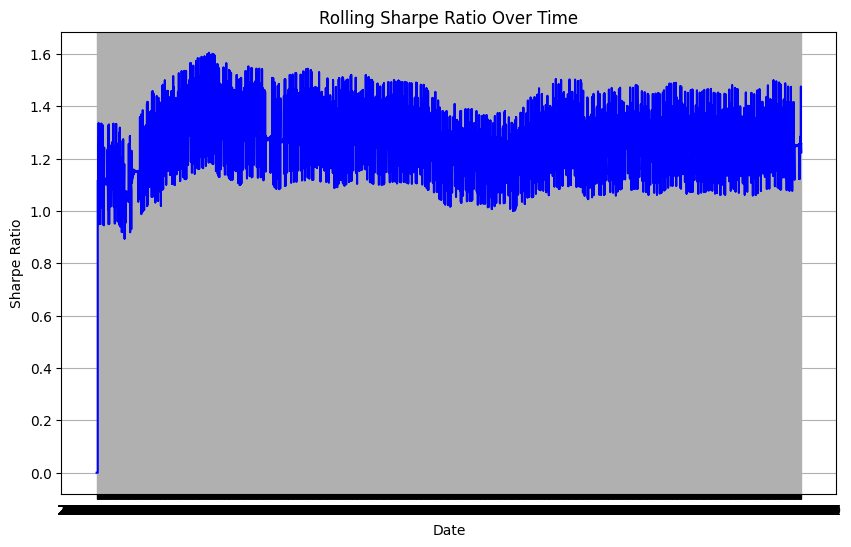

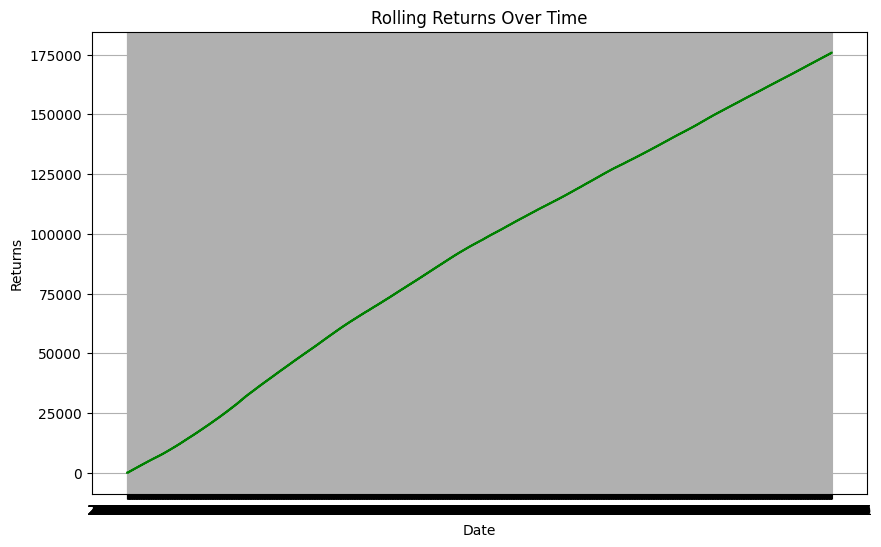

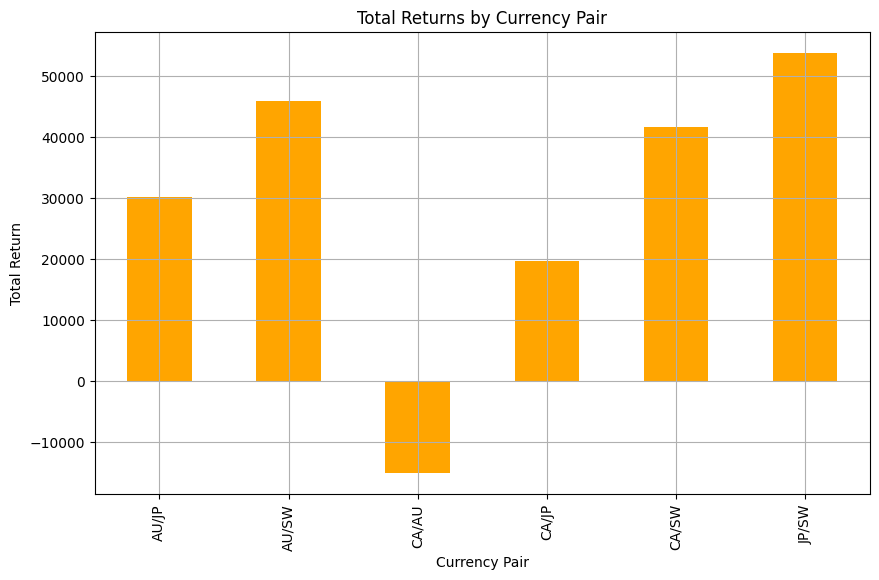

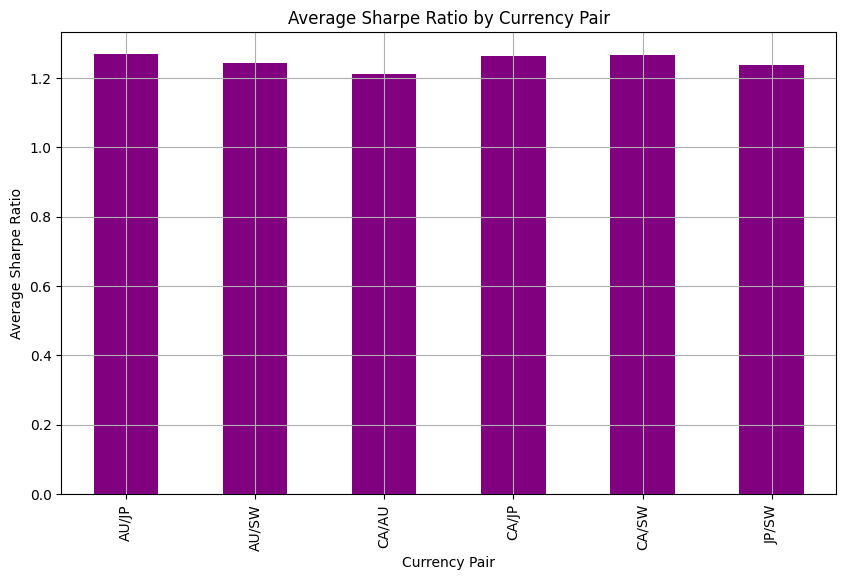

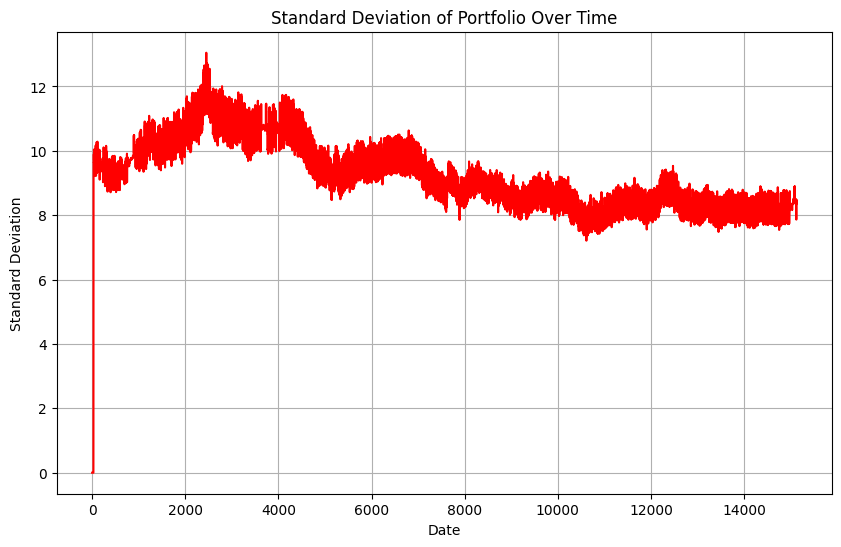

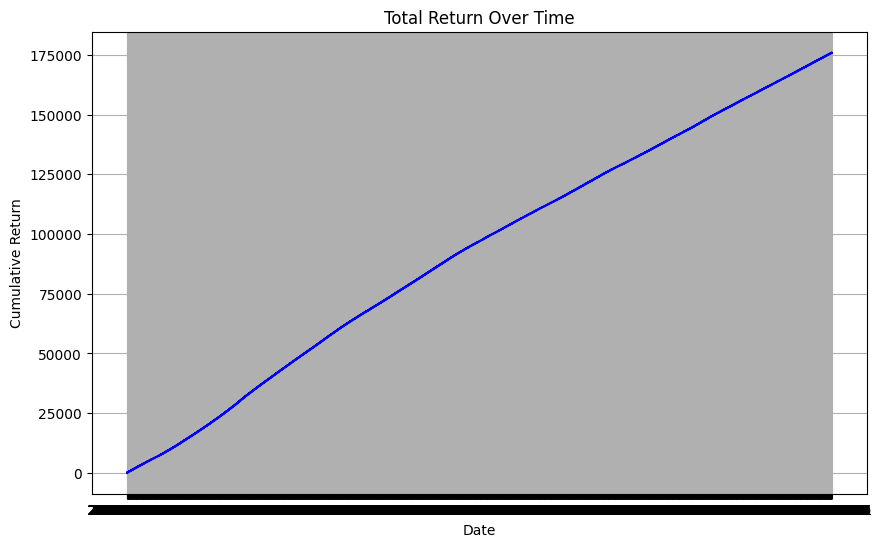

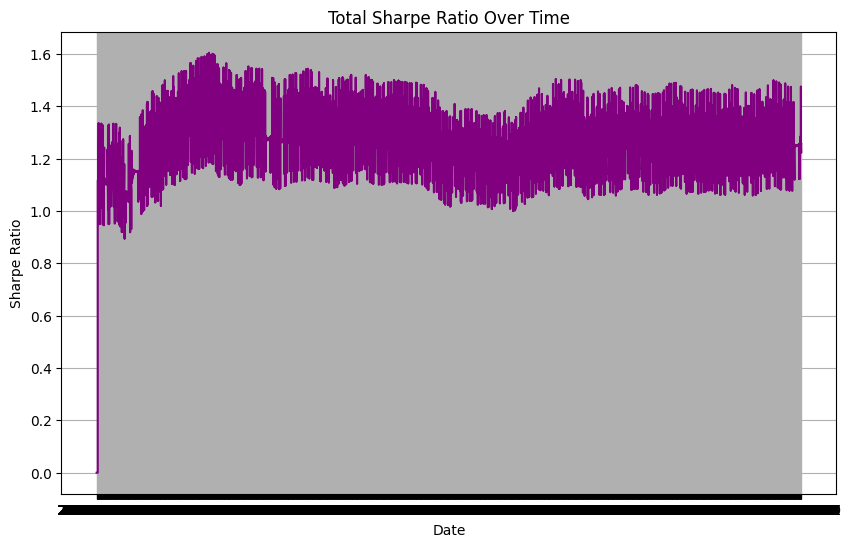

In [7]:
import matplotlib.pyplot as plt

# Simulate filling NaN values for the sake of the plot
df['Rolling_Sharpe'] = df['Rolling_Sharpe'].fillna(0)
df['Rolling_Return'] = df['Rolling_Return'].fillna(0)
df['Rolling_Sh_Std'] = df['Rolling_Sh_Std'].fillna(0)

# 1. Rolling Sharpe Ratio
plt.figure(figsize=(10, 6))
plt.plot(df['open_date'], df['Rolling_Sharpe'], label='Rolling Sharpe Ratio', color='blue')
plt.title('Rolling Sharpe Ratio Over Time')
plt.xlabel('Date')
plt.ylabel('Sharpe Ratio')
plt.grid(True)
plt.show()

# 2. Rolling Returns
plt.figure(figsize=(10, 6))
plt.plot(df['open_date'], df['Rolling_Return'], label='Rolling Returns', color='green')
plt.title('Rolling Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.grid(True)
plt.show()

# 3. Returns for Each Currency Pair
plt.figure(figsize=(10, 6))
df.groupby('currency_pair')['result'].sum().plot(kind='bar', color='orange')
plt.title('Total Returns by Currency Pair')
plt.xlabel('Currency Pair')
plt.ylabel('Total Return')
plt.grid(True)
plt.show()

# 4. Sharpe Ratio for Each Currency Pair
plt.figure(figsize=(10, 6))
df.groupby('currency_pair')['Rolling_Sharpe'].mean().plot(kind='bar', color='purple')
plt.title('Average Sharpe Ratio by Currency Pair')
plt.xlabel('Currency Pair')
plt.ylabel('Average Sharpe Ratio')
plt.grid(True)
plt.show()

# 5. Standard Deviation of Portfolio
plt.figure(figsize=(10, 6))
df['Rolling_Sh_Std'].plot(kind='line', color='red')
plt.title('Standard Deviation of Portfolio Over Time')
plt.xlabel('Date')
plt.ylabel('Standard Deviation')
plt.grid(True)
plt.show()

# 6. Total Return Over Time
plt.figure(figsize=(10, 6))
plt.plot(df['open_date'], df['Cumulative_Return'], label='Total Return', color='blue')
plt.title('Total Return Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.grid(True)
plt.show()

# 7. Total Sharpe Ratio Over Time
plt.figure(figsize=(10, 6))
plt.plot(df['open_date'], df['Rolling_Sharpe'], label='Total Sharpe Ratio', color='purple')
plt.title('Total Sharpe Ratio Over Time')
plt.xlabel('Date')
plt.ylabel('Sharpe Ratio')
plt.grid(True)
plt.show()


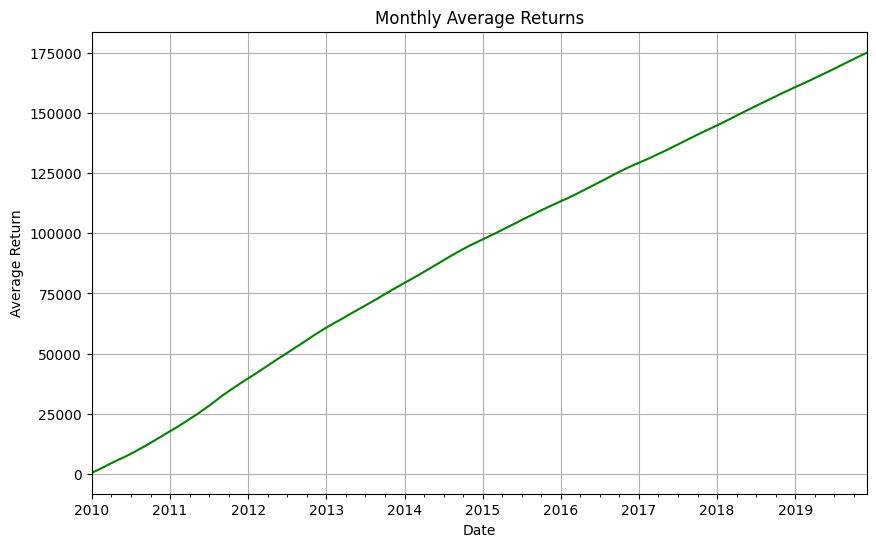

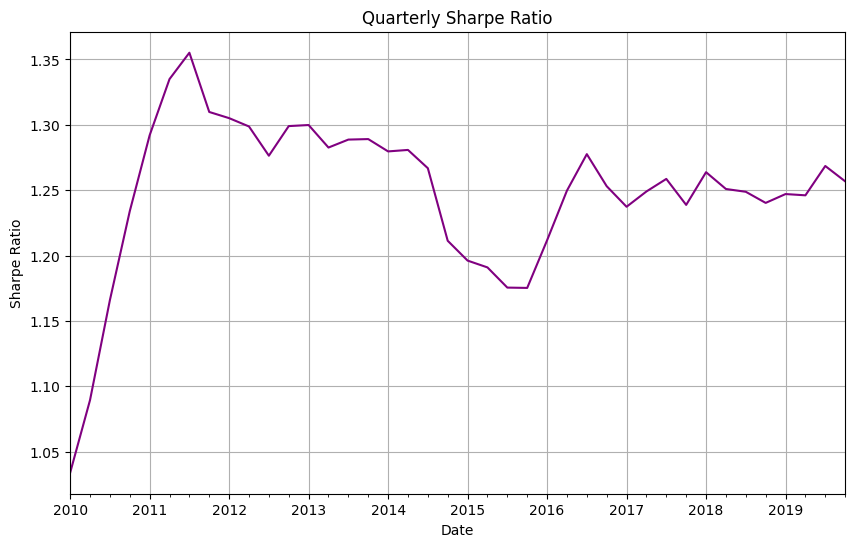

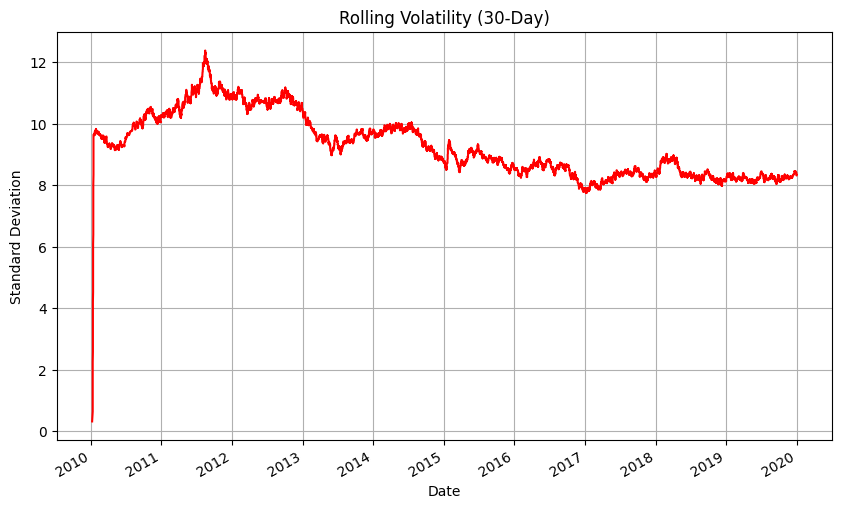

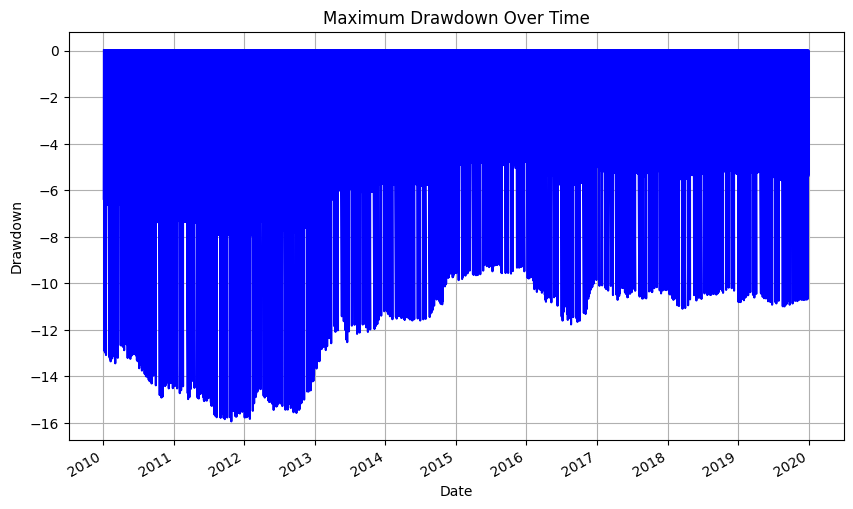

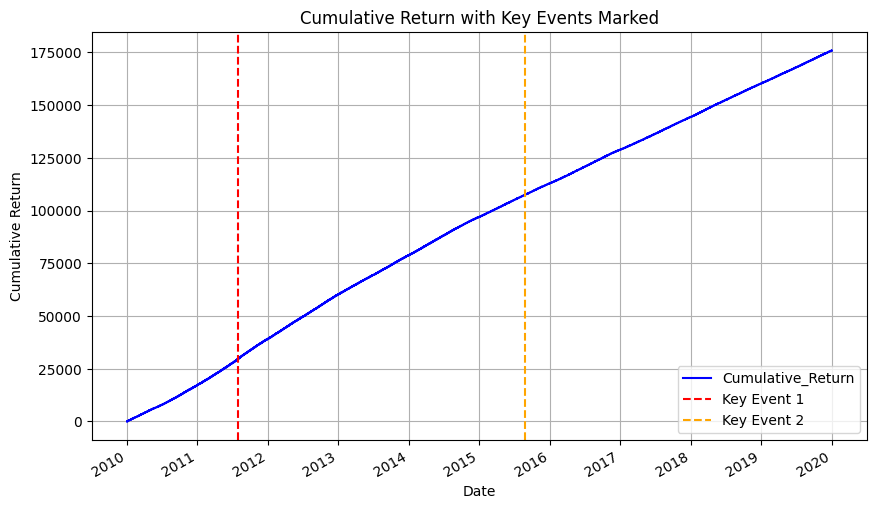

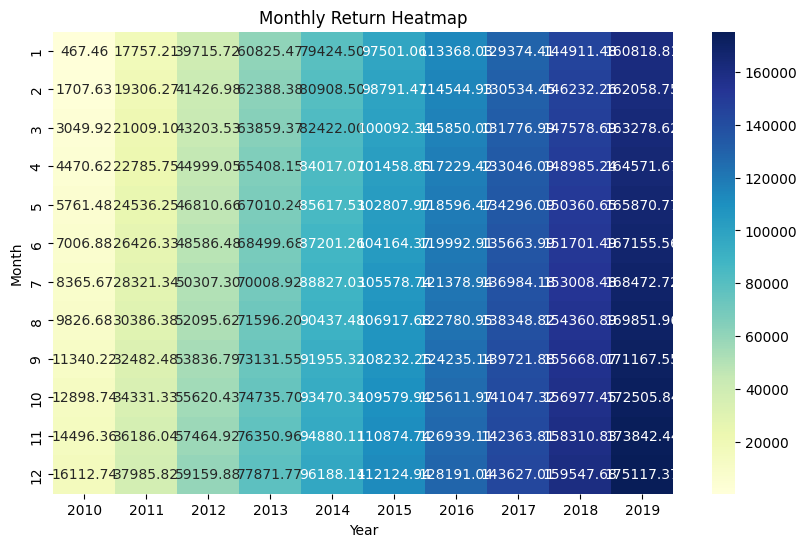

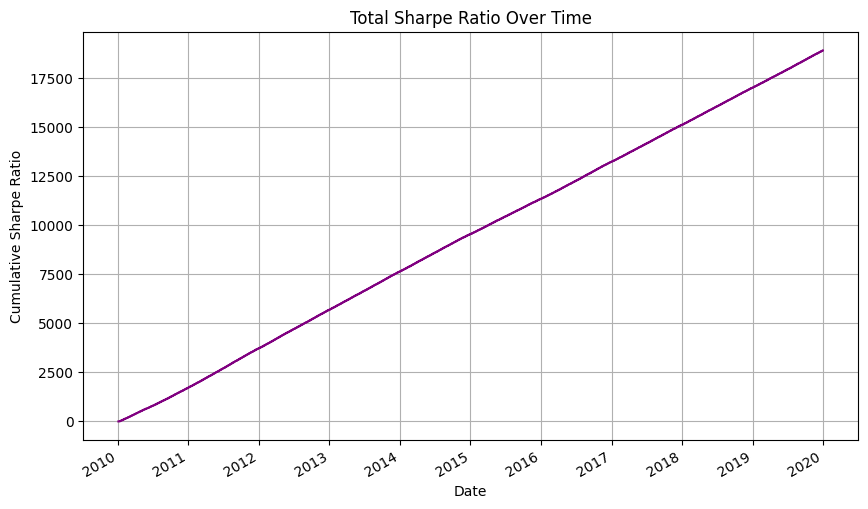

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df['open_date'] = pd.to_datetime(df['open_date'])
df.set_index('open_date', inplace=True)
numeric_cols = df.select_dtypes(include=[float, int]).columns
df_monthly = df[numeric_cols].resample('M').mean()
df_quarterly = df[numeric_cols].resample('Q').mean()

plt.figure(figsize=(10, 6))
df_monthly['Rolling_Return'].plot(kind='line', color='green')
plt.title('Monthly Average Returns')
plt.xlabel('Date')
plt.ylabel('Average Return')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
df_quarterly['Rolling_Sharpe'].plot(kind='line', color='purple')
plt.title('Quarterly Sharpe Ratio')
plt.xlabel('Date')
plt.ylabel('Sharpe Ratio')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
df['Rolling_Sh_Std'].rolling(window=30).mean().plot(kind='line', color='red')
plt.title('Rolling Volatility (30-Day)')
plt.xlabel('Date')
plt.ylabel('Standard Deviation')
plt.grid(True)
plt.show()

df['Drawdown'] = df['Cumulative_Return'] - df['Cumulative_Return'].cummax()
plt.figure(figsize=(10, 6))
df['Drawdown'].plot(kind='line', color='blue')
plt.title('Maximum Drawdown Over Time')
plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
df['Cumulative_Return'].plot(kind='line', color='blue')
plt.axvline(x=pd.to_datetime('2011-08-01'), color='red', linestyle='--', label='Key Event 1')
plt.axvline(x=pd.to_datetime('2015-08-24'), color='orange', linestyle='--', label='Key Event 2')
plt.title('Cumulative Return with Key Events Marked')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()

df_monthly['Year'] = df_monthly.index.year
df_monthly['Month'] = df_monthly.index.month
pivot_table = df_monthly.pivot(index='Month', columns='Year', values='Rolling_Return')
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="YlGnBu", cbar=True)
plt.title('Monthly Return Heatmap')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()

plt.figure(figsize=(10, 6))
df['Rolling_Sharpe'].cumsum().plot(kind='line', color='purple')
plt.title('Total Sharpe Ratio Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Sharpe Ratio')
plt.grid(True)
plt.show()


In [9]:
df.head(10)

,currency_pair,position,trade_amount,result,Cumulative_Return,Rolling_Return,Rolling_Sh_PnL,Rolling_Sh_Std,Rolling_Sharpe,date,Drawdown
open_date,,,,,,,,,,,
2010-01-04,JP/SW,short,199.691223,22.575073,22.575073,0.0,NaN,0.0,0.0,2010-01-04,0.000000
2010-01-04,AU/SW,short,43.137991,15.331242,37.906315,0.0,NaN,0.0,0.0,2010-01-04,0.000000
2010-01-04,CA/SW,short,63.927052,18.503685,56.410000,0.0,NaN,0.0,0.0,2010-01-04,0.000000
2010-01-04,AU/JP,short,26.398447,6.397666,62.807666,0.0,NaN,0.0,0.0,2010-01-04,0.000000
2010-01-04,CA/JP,short,45.988634,8.112400,70.920066,0.0,NaN,0.0,0.0,2010-01-04,0.000000
2010-01-04,CA/AU,short,97.212531,-6.411166,64.508900,0.0,NaN,0.0,0.0,2010-01-04,-6.411166
2010-01-05,JP/SW,short,198.664670,22.459021,86.967921,0.0,NaN,0.0,0.0,2010-01-05,0.000000
2010-01-05,AU/SW,short,43.000229,15.282281,102.250202,0.0,NaN,0.0,0.0,2010-01-05,0.000000
2010-01-05,CA/SW,short,64.917052,18.790241,121.040443,0.0,NaN,0.0,0.0,2010-01-05,0.000000


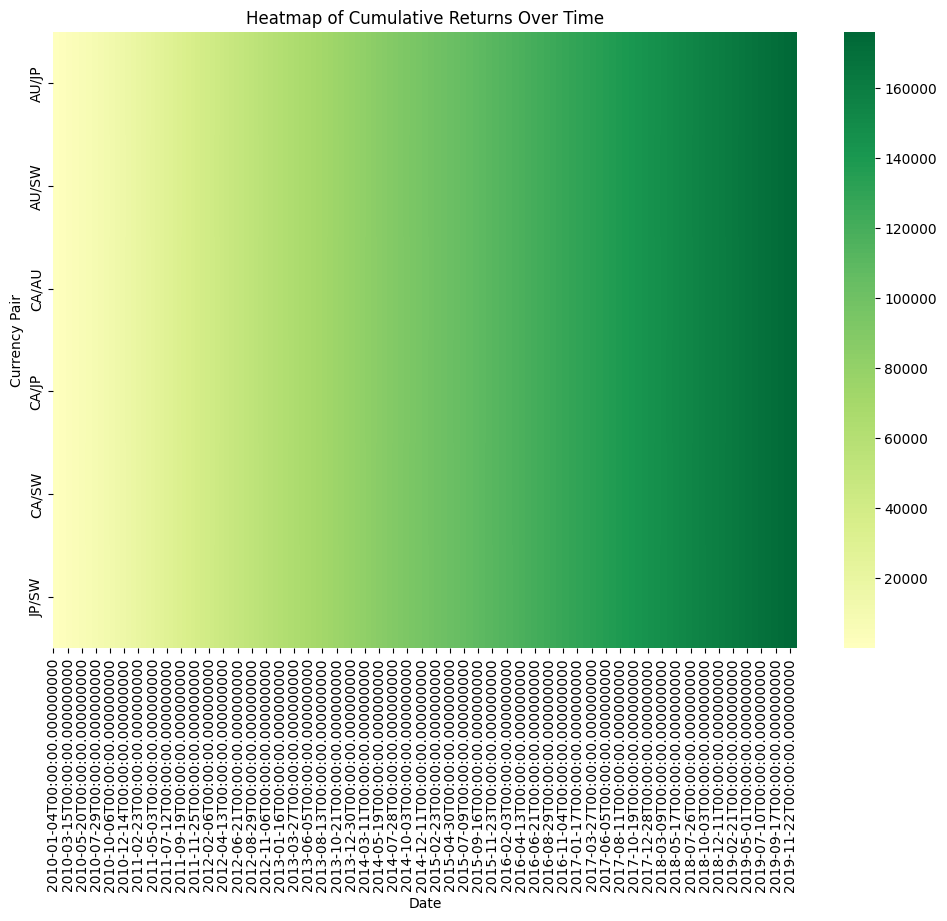

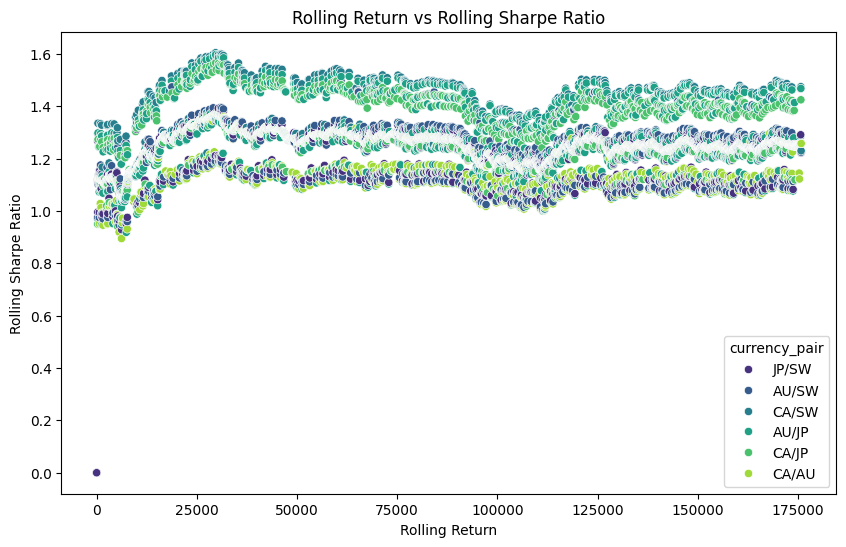

NameError: name 'seasonal_decompose' is not defined

In [10]:

# 1. Cumulative Return Heatmap Over Time
df_pivot = df.pivot_table(index=df.index, columns='currency_pair', values='Cumulative_Return')
plt.figure(figsize=(12, 8))
sns.heatmap(df_pivot.T, cmap='RdYlGn', cbar=True, center=0)
plt.title('Heatmap of Cumulative Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Currency Pair')
plt.show()

# 2. Rolling Return vs Rolling Sharpe Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Rolling_Return'], y=df['Rolling_Sharpe'], hue=df['currency_pair'], palette='viridis')
plt.title('Rolling Return vs Rolling Sharpe Ratio')
plt.xlabel('Rolling Return')
plt.ylabel('Rolling Sharpe Ratio')
plt.show()

# 3. Time-Series Decomposition (selecting first currency pair for example)
currency_pair = df['currency_pair'].unique()[0]
df_currency = df[df['currency_pair'] == currency_pair]
result = seasonal_decompose(df_currency['Cumulative_Return'], model='additive', period=252)
plt.figure(figsize=(10, 8))
result.plot()
plt.suptitle(f'Time Series Decomposition of {currency_pair} Cumulative Returns', y=1.05)
plt.show()

# 4. Autocorrelation Plot of Returns
plt.figure(figsize=(10, 6))
autocorrelation_plot(df['Rolling_Return'].dropna())
plt.title('Autocorrelation of Rolling Returns')
plt.show()

# 5. Distribution of Returns with KDE by Currency Pair
plt.figure(figsize=(12, 8))
for pair in df['currency_pair'].unique():
    sns.kdeplot(df[df['currency_pair'] == pair]['Rolling_Return'].dropna(), label=pair)
plt.title('KDE Plot of Rolling Returns by Currency Pair')
plt.xlabel('Rolling Return')
plt.ylabel('Density')
plt.legend()
plt.show()

# 6. Return Boxplots by Currency Pair
plt.figure(figsize=(10, 6))
sns.boxplot(x='currency_pair', y='Rolling_Return', data=df)
plt.title('Boxplot of Rolling Returns by Currency Pair')
plt.xlabel('Currency Pair')
plt.ylabel('Rolling Return')
plt.xticks(rotation=45)
plt.show()

# 7. Drawdown Waterfall Chart
df['Drawdown'] = df['Drawdown'].fillna(0)
df['Cumulative_Drawdown'] = df['Drawdown'].cumsum()
plt.figure(figsize=(10, 6))
sns.barplot(x=df.index, y=df['Drawdown'], color='red')
plt.title('Drawdown Waterfall Chart')
plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.xticks([], rotation=90)
plt.show()


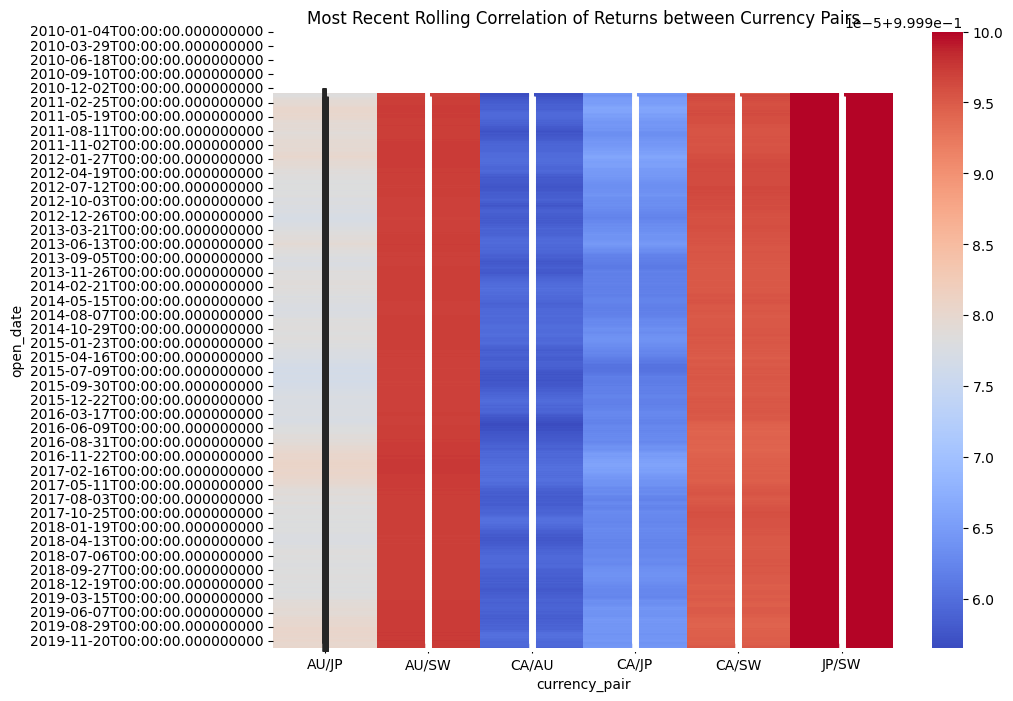

In [11]:
# Calculate rolling correlations for each currency pair
rolling_window = 252
df_corr_time = df.pivot_table(index=df.index, columns='currency_pair', values='Rolling_Return').rolling(window=rolling_window).corr()

# Extract the most recent correlation matrix
latest_corr_matrix = df_corr_time.groupby(level=0).last()

plt.figure(figsize=(10, 8))
sns.heatmap(latest_corr_matrix, annot=True, cmap='coolwarm')
plt.title('Most Recent Rolling Correlation of Returns between Currency Pairs')
plt.show()

In [12]:
import numpy as np
df.index = pd.to_datetime(df.index)

df['Year'] = df.index.year
df['Month'] = df.index.month

month_by_month_table = df.pivot_table(index='Year', columns='Month', values='Cumulative_Return', aggfunc='sum')

print("Month-by-Month Live Track Record")
print(month_by_month_table)

month_by_month_table.to_csv('month_by_month_live_track_record.csv')

yearly_returns = df.resample('Y').agg({
    'Cumulative_Return': 'sum',
    'Rolling_Return': 'sum',
    'Rolling_Sh_Std': 'mean',
})

yearly_returns['Annualized_Return'] = yearly_returns['Cumulative_Return']
yearly_returns['Annualized_Volatility'] = yearly_returns['Rolling_Sh_Std'] * np.sqrt(12)
yearly_returns['Max_Drawdown'] = df.resample('Y')['Drawdown'].min()
yearly_returns['Yearly_Sharpe_Ratio'] = yearly_returns['Annualized_Return'] / yearly_returns['Annualized_Volatility']

yearly_analysis_table = yearly_returns[['Annualized_Return', 'Annualized_Volatility', 'Max_Drawdown', 'Yearly_Sharpe_Ratio']]

print("Year-by-Year Returns Analysis")
print(yearly_analysis_table)

yearly_analysis_table.to_csv('yearly_returns_analysis.csv')


Month-by-Month Live Track Record
Month            1             2             3             4             5   \
Year                                                                          
2010   7.167280e+04  2.122264e+05  4.423295e+05  6.099229e+05  7.087176e+05   
2011   2.153718e+06  2.222891e+06  2.926909e+06  2.758328e+06  3.117992e+06   
2012   4.790266e+06  4.996238e+06  5.729541e+06  5.695368e+06  6.205763e+06   
2013   7.688030e+06  7.133622e+06  7.684509e+06  8.657344e+06  8.867829e+06   
2014   1.002982e+07  9.244236e+06  1.040843e+07  1.060926e+07  1.081089e+07   
2015   1.171892e+07  1.128018e+07  1.323191e+07  1.341258e+07  1.235585e+07   
2016   1.294043e+07  1.376333e+07  1.531217e+07  1.479079e+07  1.496284e+07   
2017   1.554190e+07  1.489726e+07  1.820519e+07  1.518406e+07  1.774661e+07   
2018   1.827831e+07  1.668915e+07  1.861543e+07  1.879218e+07  1.986735e+07   
2019   2.028223e+07  1.849165e+07  2.059171e+07  2.075464e+07  2.191428e+07   

Month            6

In [15]:
# Assuming 'df' has the trade data with columns like 'Cumulative_Return', 'Portfolio_Return', etc.

df.index = pd.to_datetime(df.index)
df['Year'] = df.index.year
df['Month'] = df.index.month

# Month-by-Month Live Track Record
month_by_month_table = df.pivot_table(index='Year', columns='Month', values='Cumulative_Return', aggfunc='sum')
month_by_month_table = month_by_month_table.applymap(lambda x: round(x, 2) if pd.notnull(x) else "")
print("Month-by-Month Live Track Record")
print(month_by_month_table)
month_by_month_table.to_csv('month_by_month_live_track_record.csv')

# Calculate the total portfolio returns (sum of all trades in the year)
df['Portfolio_Return'] = df['Cumulative_Return'].fillna(0)

# Calculate the Sharpe ratio for the entire portfolio
portfolio_annualized_return = df['Portfolio_Return'].sum() / len(df) * 252
portfolio_annualized_volatility = df['Portfolio_Return'].std() * np.sqrt(252)
portfolio_sharpe_ratio = portfolio_annualized_return / portfolio_annualized_volatility

print(f"Portfolio Annualized Return: {round(portfolio_annualized_return, 2)}")
print(f"Portfolio Annualized Volatility: {round(portfolio_annualized_volatility, 2)}")
print(f"Portfolio Sharpe Ratio: {round(portfolio_sharpe_ratio, 2)}")

# Year-by-Year Returns Analysis
yearly_returns = df.resample('Y').agg({
    'Portfolio_Return': 'sum',
    'Rolling_Sh_Std': 'mean',
})

# Calculate year-by-year returns as the sum of all returns in each year
yearly_returns['Annualized_Return'] = yearly_returns['Portfolio_Return']
yearly_returns['Annualized_Volatility'] = yearly_returns['Rolling_Sh_Std'] * np.sqrt(252)
yearly_returns['Max_Drawdown'] = df.resample('Y')['Drawdown'].min()
yearly_returns['Yearly_Sharpe_Ratio'] = yearly_returns['Annualized_Return'] / yearly_returns['Annualized_Volatility']

yearly_analysis_table = yearly_returns[['Annualized_Return', 'Annualized_Volatility', 'Max_Drawdown', 'Yearly_Sharpe_Ratio']]
print("Year-by-Year Returns Analysis")
print(yearly_analysis_table)
yearly_analysis_table.to_csv('yearly_returns_analysis.csv')


Month-by-Month Live Track Record
Month           1            2            3            4            5   \
Year                                                                     
2010      71672.80    212226.37    442329.49    609922.89    708717.59   
2011    2153717.52   2222890.62   2926909.14   2758327.73   3117992.35   
2012    4790265.83   4996237.50   5729541.41   5695367.81   6205762.50   
2013    7688030.23   7133622.14   7684509.01   8657343.65   8867828.78   
2014   10029815.47   9244236.06  10408434.08  10609263.62  10810891.90   
2015   11718924.13  11280180.58  13231912.32  13412580.94  12355850.39   
2016   12940431.07  13763330.23  15312165.89  14790789.31  14962842.93   
2017   15541900.52  14897263.58  18205194.54  15184063.72  17746613.27   
2018   18278312.54  16689151.35  18615428.09  18792175.50  19867347.45   
2019   20282233.52  18491648.97  20591710.87  20754642.65  21914277.70   

Month           6            7            8            9            10  \
Year

<ipython-input-15-ef4490510e98>:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  month_by_month_table = month_by_month_table.applymap(lambda x: round(x, 2) if pd.notnull(x) else "")


[*********************100%%**********************]  1 of 1 completed


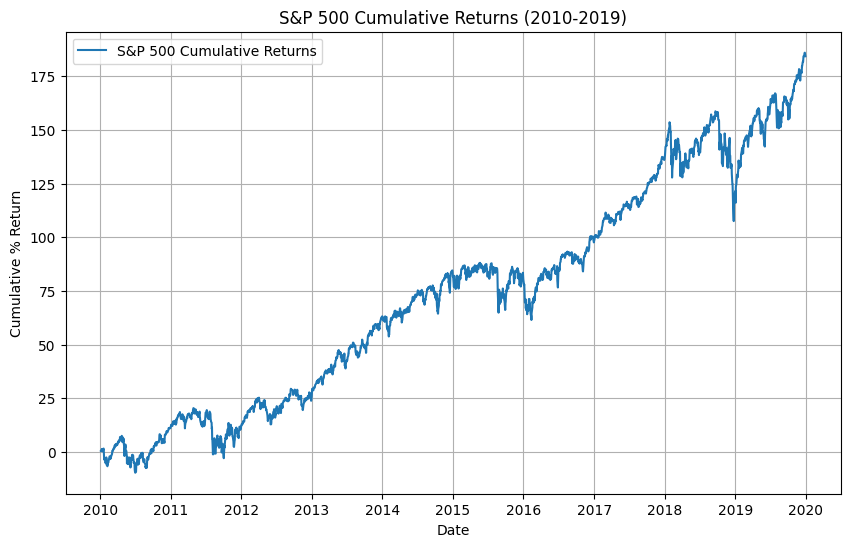

In [16]:
import yfinance as yf
import matplotlib.pyplot as plt

sp500 = yf.download('^GSPC', start='2010-01-01', end='2019-12-31')

sp500['Cumulative Return'] = (1 + sp500['Adj Close'].pct_change()).cumprod() - 1

sp500['Cumulative Return'] *= 100

plt.figure(figsize=(10, 6))
plt.plot(sp500.index, sp500['Cumulative Return'], label='S&P 500 Cumulative Returns')
plt.title('S&P 500 Cumulative Returns (2010-2019)')
plt.xlabel('Date')
plt.ylabel('Cumulative % Return')
plt.grid(True)
plt.legend()
plt.show()